In [1]:
import pandas as pd
import pickle as pkl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import random

### Importing the dataset

In [2]:
train_data = pd.read_pickle('data/train.pkl')
test_data = pd.read_pickle('data/test.pkl')
print(len(train_data))

8000


### Plotting the training data set

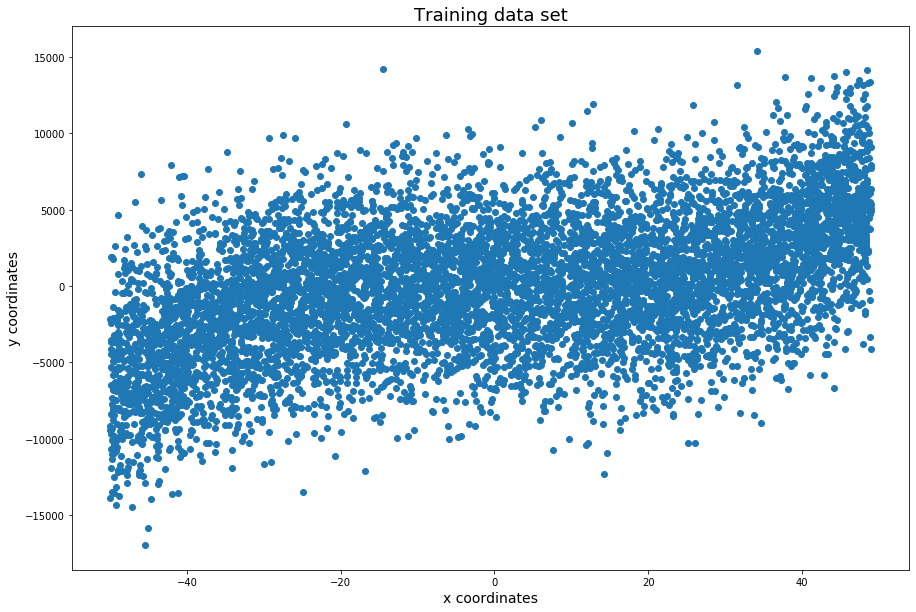

In [3]:
plt.figure(figsize=(15,10))
plt.scatter(train_data[:,0],train_data[:,1])
plt.xlabel('x coordinates',fontsize = 14)
plt.ylabel('y coordinates',fontsize = 14)
plt.title('Training data set', fontsize = 18)
plt.show()

### Plotting the test dataset

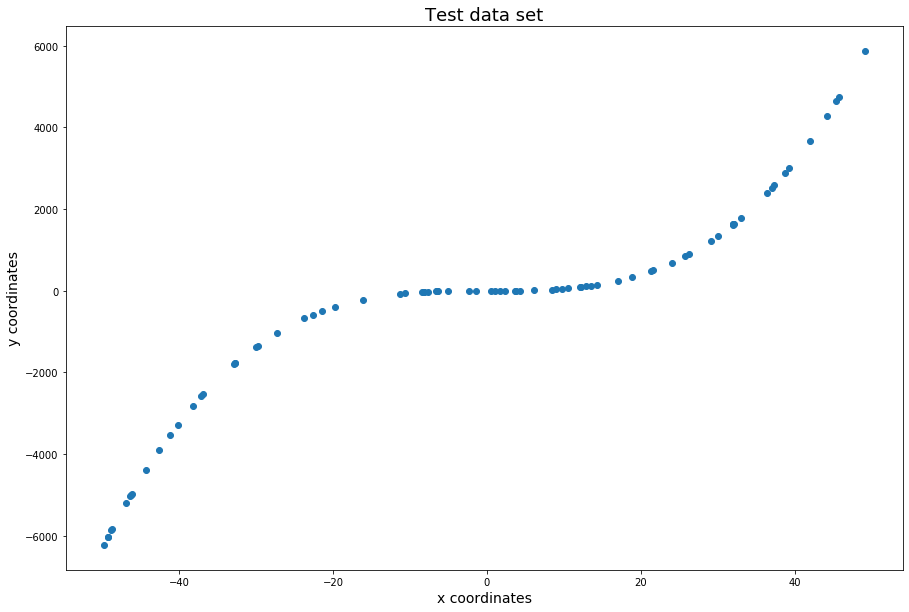

In [4]:
plt.figure(figsize=(15,10))
plt.scatter(test_data[:,0],test_data[:,1])
plt.xlabel('x coordinates',fontsize = 14)
plt.ylabel('y coordinates',fontsize = 14)
plt.title('Test data set', fontsize = 18)
plt.show()

In [5]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    #print(f'# This is a polynomial of order {ord}.')
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    
#print("returning ",y)
    return y

### Setting some constants and shuffling the training data

In [6]:
# Setting some constants
poly_deg = 20
divs = 10
part_size = int(len(train_data)/divs)
random.shuffle(train_data)

 ## A brief explanation of what function does the method, LinearRegression().fit() performs.
Let us assume that our current training dataset D consists of ‘n’ instances.
Let the degree of polynomial be ‘$deg$’. Now, there will be (deg+1) coefficients (after including the constant term as well).
The given function takes $2$ inputs:
* Matrix containing the input features for each instance ( $n$ X ($deg+1$)) matrix
* Corresponding actual y (the ‘y’ value which was observed in the real world) which is a (n X 1 array)

As far as the theoretical part of linear regression is concerned, we are aware of the **gradient descent method** which is used to obtain the coefficients which reduce the average value of the squared error to be the minimum. Also, in gradient descent we usually make small steps. Thus, for the jth coefficient, we do the following: 
![title](images/picture.png)
Here, alpha is predetermined and can be manipulated. 
If the alpha is very small, chances are that the number of iterations required for convergence will be very large.
If alpha is very large, chances are that we escape the minima(jump over the local minima).


#### A thing we noticed
We noticed that the LinearRegression.fit() does not obtain optimal coefficients always.
We tailormade a test case for function $f(x)=1+2x+3x^2+3x^3+2x^4+x^5$ and kept training dataset size as 2 for the 1st case and 9 for the second case. In the 1st case, the coefficients produced did were not optimal and overall MSE was not zero which proves that the **internal implementation does not go all the way but stops after some fixed precision/error threshold.**(refer to manipulation of alpha). But in second case, since number of training examples is more, the error with non-optimal coefficients would have been large and hence, the LinearRegression.fit() would have given some more iterations and reach d optimal value.

###### In this case, our train set is just 2 instances. As a result, the original coefficients are not restored.

In [7]:
coeffs=[1,2,3,3,2,1]
#######################################
x_arr=np.arange(1,3,1)
#x_arr = x_arr[:,np.newaxis]

#print("arange is ", x_arr)
poly = PolynomialFeatures(degree=len(coeffs)-1)
x_check = poly.fit_transform(x_arr[:,np.newaxis]) # now a matrix of size (80 X (n+1))
#print("x check is ",x_check)
regr = linear_model.LinearRegression()
y_check=[]
for i in range(0,len(x_arr)):
   # print(i)
    #print(x_arr[i])
    y_check.append(PolyCoefficients(x_arr[i],coeffs))
#x_arr[:,np.newaxis]
#print("y check is ",y_check)
regr.fit(x_check,y_check)
regr.coef_[0]=regr.intercept_


print("intercept,coefficient: ", regr.coef_)

intercept,coefficient:  [7.74216867 0.0746988  0.22409639 0.52289157 1.12048193 2.31566265]


###### In this case, our train set is just 9 instances. As a result, the original coefficients are restored as sufficient data points are present.

In [8]:
coeffs=[1,2,3,3,2,1]
#######################################
x_arr=np.arange(1,10,1)
#x_arr = x_arr[:,np.newaxis]

#print("arange is ", x_arr)
poly = PolynomialFeatures(degree=len(coeffs)-1)
x_check = poly.fit_transform(x_arr[:,np.newaxis]) # now a matrix of size (80 X (n+1))
#print("x check is ",x_check)
regr = linear_model.LinearRegression()
y_check=[]
for i in range(0,len(x_arr)):
   # print(i)
    #print(x_arr[i])
    y_check.append(PolyCoefficients(x_arr[i],coeffs))
#x_arr[:,np.newaxis]
#print("y check is ",y_check)
regr.fit(x_check,y_check)
regr.coef_[0]=regr.intercept_


print("intercept,coefficient: ", regr.coef_)

intercept,coefficient:  [1. 2. 3. 3. 2. 1.]


**Assignment specific use of LinearRegression.fit()**:

Each training data set size is 8000/10=800 and so, the first argument is a matrix of size (800 X (deg+1)) and the second argument is an array of (800 X 1).


## Details regarding training of the models
For the given data sets, we are trying to fit a linear regression model on the training dataset for polynomials ranging from degree $1$ to $20$.
Let’s say that our regression function is a polynomial of degree $'n’$ and hence, the polynomial would be **determined by the $(n+1)$ coefficients** (after including the constant term as well).
Also, let the size of the entire training set be $‘sz’$. We are ***partitioning the training dataset into 10 equal parts*** (after randomly shuffling the entries in the training dataset) each of size ‘$sz/10$’ and then training a polynomial of degree ‘$n$’ on each of these partitions. In other words, we are finding the $(n+1)$ coefficients by linear regression on each of the partitions as a training dataset. 
So, for a fixed polynomial degree, we will have $10$ classifiers. It is worthwhile to note that **each of these classifiers can be represented by a $(n+1)$ length vector which corresponds to the (n+1) coefficients of the ‘n’ degree polynomial.**

**To summarize, 
Number of models we are using: $20$**

**Number of different versions(realizations) of a model using a particular degree: $10$**

In the outer loop, we are iterating over integers from $1$ to $20$ (the degrees of the polynomials).
In the inner loop, we are training a polynomial of degree ‘$deg$’ $10$ times (each time on a different partition of the dataset) and using the coefficients obtained to calculate the bias and variance quantities for a model using polynomials of a particular degree ‘deg’. **Our net model for a given degree of polynomial will be the average of the coefficients of these classifiers.**


In [9]:
plot_curves=[]

# keeping track of degrees (length = poly_deg)
degs = [0] * poly_deg
bias_sqr = [0] * poly_deg # initializing with zeroes
bias_mean = [0] * poly_deg # initializing with zeroes
variance = [0] * poly_deg # initializing with zeroes
noise = [0] * poly_deg # initializing with zeroes
tot_error = [0] * poly_deg # initializing with zeroes

for deg in range(1, poly_deg+1):

    degs[deg-1] = deg
    print("degree being investigated is : ",deg)

    poly = PolynomialFeatures(deg)

    # here net model keeps track of the E[f_bar(x)] in the notation used in the pdf (h_bar in our notation)
    net_model = [0] * (deg+1)

    # keeps track of all the H's (f_bar(x) as per assignment pdf) for a current degree (length after final operation must be 'divs')
    models = []

    for part in range(0,divs):
        # extracting the data to be used for training in current iteration
        x_c = train_data[part*part_size:(part+1)*part_size ,0][:,np.newaxis]
        y_c = train_data[part*part_size:(part+1)*part_size ,1]

        # getting the other powers
        x_mat = poly.fit_transform(x_c)

        # fitting the model
        reg = LinearRegression().fit(x_mat,y_c)
        reg.coef_[0] = reg.intercept_
        net_model+= reg.coef_ 
        
        # appending the coefficients derived in this current realization
        models.append(reg.coef_)
        # print('------------------------------------------')
        
    net_model/=divs # average over the coefficents of the 10 realizations
    print('net model: ',net_model)

    # extracting x and y coordinates of test set
    x_test = test_data[:,0]
    y_test = test_data[:,1]
    
    # getting higher powers of the x coordinates of the test set
    x_mat = poly.fit_transform(x_test[:,np.newaxis])
    
    # size of net model is (deg+1 X 1) -> h_bar
    y_predic = np.dot(x_mat, net_model)    
    
   
    ######### VARIANCE ########################
    for part in range(0,divs):
        res = np.dot(x_mat,(net_model - models[part]))
        variance[deg-1] += np.dot(res,res)/(len(res))
    variance[deg-1]/=divs;
    print("Calculated Variance: ",variance[deg-1])
    

    ######### BIAS ######################################
    plot_curves.append({"predicted":y_predic,"expected":y_test, "x_c":x_test})    
    
    bias = y_predic - y_test
    bias_mean[deg-1]=np.sum(np.abs(bias))/len(bias)
    print("bias absolute mean: ", bias_mean[deg-1])
    bias_sqr[deg-1] = np.dot(bias, bias)/len(bias)
    print("Bias squared: ",bias_sqr[deg-1])
    
    
    ############## TOT ERROR IS #############################
    
    tot_err_mat=np.dot(x_mat, np.array(models).T) - np.vstack(y_test)    
    squared_err=np.square(tot_err_mat)
    tot_error[deg-1]=np.sum(squared_err)/(divs*len(test_data))
    print("TOTAL error is ", tot_error[deg-1])
    

    ############## NOISE #################################################
    noise[deg-1]=tot_error[deg-1] - bias_sqr[deg-1] - variance[deg-1]
    print("Noise found is ", noise[deg-1])
    
    print("############################################################")


degree being investigated is :  1
net model:  [-7.13831561 74.15703863]
Calculated Variance:  42722.03415775878
bias absolute mean:  822.7527715127908
Bias squared:  1010592.9944223702
TOTAL error is  1053315.028580129
Noise found is  -8.731149137020111e-11
############################################################
degree being investigated is :  2
net model:  [78.68997047 74.06904193 -0.10649636]
Calculated Variance:  64676.486006278545
bias absolute mean:  814.2053808051334
Bias squared:  965363.7301849304
TOTAL error is  1030040.2161912089
Noise found is  0.0
############################################################
degree being investigated is :  3
net model:  [ 7.52703500e+01 -6.64426279e+00 -8.68419717e-02  5.49303976e-02]
Calculated Variance:  78492.73221894923
bias absolute mean:  94.94053768408783
Bias squared:  16843.399605654027
TOTAL error is  95336.13182460329
Noise found is  4.3655745685100555e-11
############################################################
degree be

net model:  [ 2.06710957e+01  1.25286068e-18  3.64779482e-20  7.58024465e-24
 -2.56919973e-24  8.80657632e-27  2.66463254e-24  8.96699973e-24
  2.36066171e-21  5.35999776e-21  1.70014181e-18  2.09248456e-18
  7.79364821e-16  1.57799931e-16 -1.38993258e-18 -2.10152921e-19
  7.93768014e-22  9.48414028e-23 -1.46422578e-25 -1.44092173e-26]
Calculated Variance:  549674.2374760299
bias absolute mean:  326.5156340039574
Bias squared:  275813.2359326688
TOTAL error is  825487.473408765
Noise found is  6.635673344135284e-08
############################################################
degree being investigated is :  20
net model:  [ 4.15195158e+00 -2.85557750e-20 -5.96580816e-21  1.91113845e-24
 -1.97410009e-25 -1.64133603e-29  1.30631742e-27  5.66876575e-25
  1.01602476e-24  4.98685663e-22  6.34070112e-22  3.59877866e-19
  2.41027959e-19  1.65879585e-16  7.67846545e-19 -2.23065298e-19
 -1.24849708e-21  1.01607006e-22  6.63701367e-25 -1.55738250e-26
 -1.15630578e-28]
Calculated Variance:  658122

### Tabulating the bias, variance, noise, bias squared and other quantities

In [10]:
data = {'deg': degs, 'variance': variance, 'bias square':bias_sqr, 'mean bias': bias_mean, 'noise': noise,"total error":tot_error}
df = pd.DataFrame(data=data)
print(df)

    deg       variance   bias square   mean bias         noise   total error
0     1   42722.034158  1.010593e+06  822.752772 -8.731149e-11  1.053315e+06
1     2   64676.486006  9.653637e+05  814.205381  0.000000e+00  1.030040e+06
2     3   78492.732219  1.684340e+04   94.940538  4.365575e-11  9.533613e+04
3     4   90145.112996  1.948222e+04  124.298704  1.455192e-11  1.096273e+05
4     5  177243.886652  2.074163e+04  128.461931 -2.910383e-11  1.979855e+05
5     6  199155.481590  2.802552e+04  144.124743  8.731149e-11  2.271810e+05
6     7  200853.414957  3.073127e+04  153.437633 -1.455192e-10  2.315847e+05
7     8  243769.695907  4.430699e+04  180.789693 -3.201421e-10  2.880767e+05
8     9  257742.060724  4.255026e+04  177.396710  2.619345e-10  3.002923e+05
9    10  272529.501302  4.388972e+04  181.403572  1.688022e-09  3.164192e+05
10   11  316093.343852  4.701637e+04  178.731082 -1.280569e-09  3.631097e+05
11   12  304650.216666  4.939955e+04  180.549867  6.752089e-09  3.540498e+05

# Bias squared variance curve

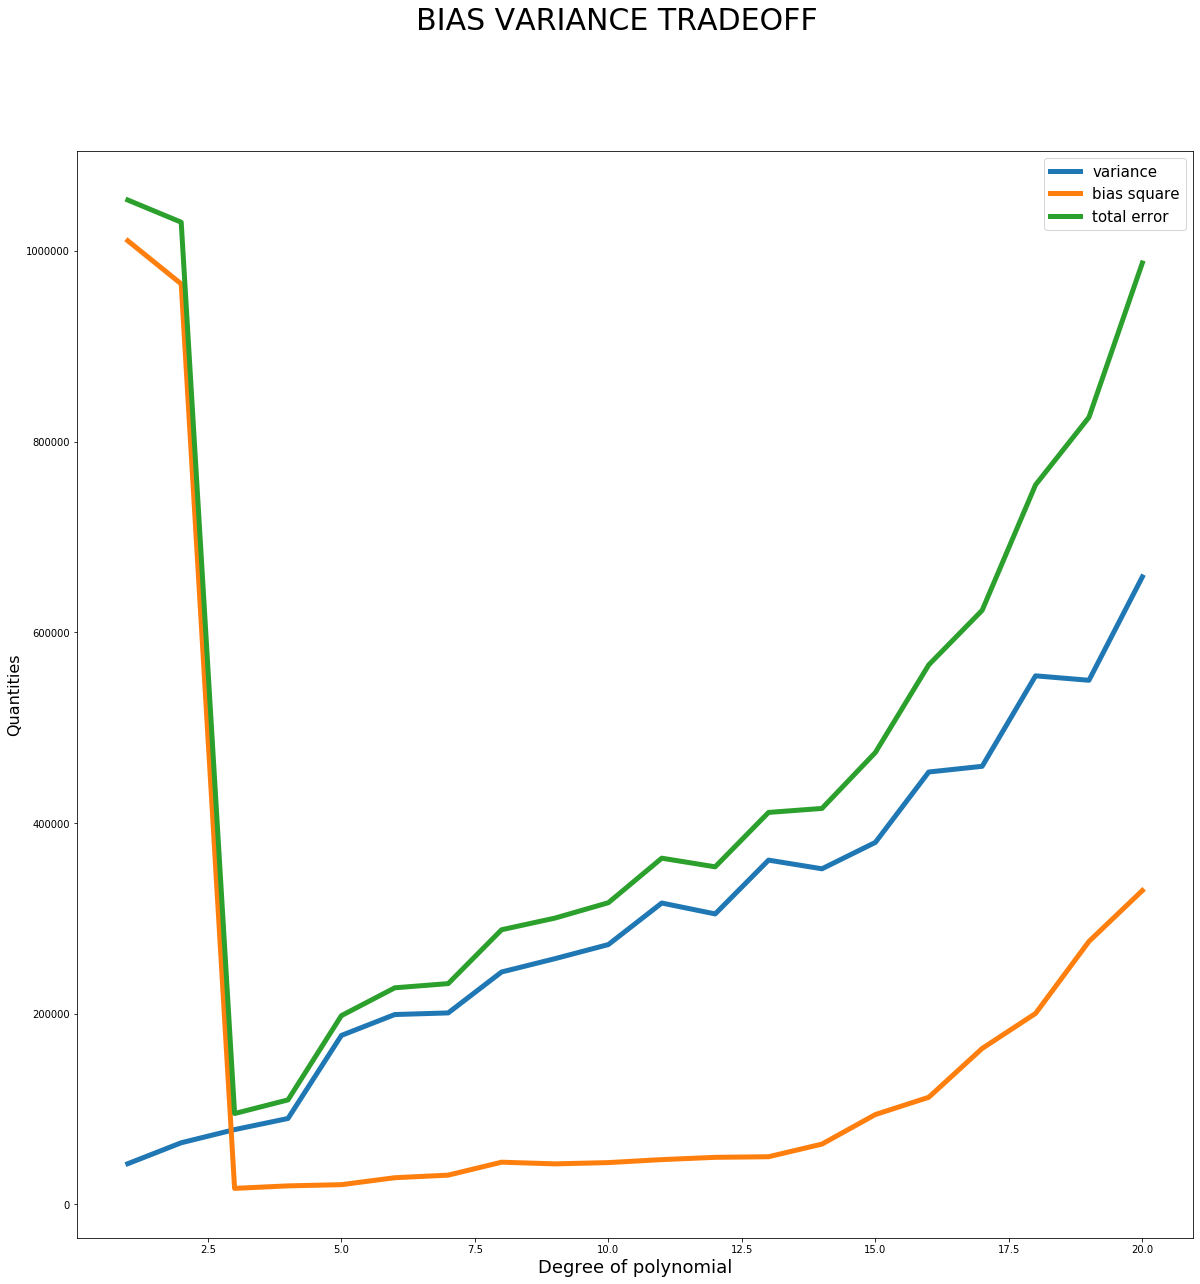

In [11]:
fig=plt.figure(figsize=(20,20))
plt.plot(degs,variance, label='variance',linewidth=5)
plt.plot(degs,bias_sqr, label='bias square',linewidth=5)
plt.plot(degs,tot_error, label='total error',linewidth=5)
fig.suptitle('BIAS VARIANCE TRADEOFF', fontsize=30)
plt.xlabel('Degree of polynomial', fontsize=18)
plt.ylabel('Quantities', fontsize=16)
# fig.savefig('test.jpg')
plt.legend(prop={'size': 15})

## Explaining the curves obtained

## Our note regarding bias
Bias is the difference between the average prediction of our model and the actual value which we are trying to predict. A model with high bias does not generalize the data well and oversimplifies the model. It always leads to a high error on training and test data.
High bias arises due to our classifier being "biased" to a particular kind of solution (e.g. linear classifier). **It means that the model being used is not robust enough to produce an accurate prediction. In other words, bias is inherent to our model .**

### Model specific obervations related to bias
In order to calculate bias squared for a polynomial of specific degree, we are doing the following:
Firstly, as has been mentioned above, we are training 10 versions of the same model.
Now, let a particular point in the test set be <x,y>. Now, let’s say that the $10$ different realizations predict a y_value of $val_{1}, val_{2},.......val_{10}$ for this particular ‘x’. Then, the contribution of this test point to squared bias is $[ { (val_{1}+val_{2}+...+val_{10})/10 } - y ]^2$. Obviously, we average this squared bias over all the test points. 
[Here, (val_1+val_2+...+val_10)/10 : represents the average prediction we might make if we end up using a model of this particular polynomial degree].

In the assignment, **the trained model for polynomial degrees 1 and 2 is over simplified and does not fit the data well causing a high bias.**
At degree 3, the bias comes out to be minimum. This matches our expectations as we see that the plot of the dataset seems to be fitting a cubic function best.
Till degree 12, the bias remains almost constant or increases slightly.
From 12 onward, we notice that bias squared increases rapidly, even though theoretically it shouldn't because we are actually overfitting. 
**The reason for this, we believe, is that at high degrees of polynomial, LinearRegression().fit() is not able to produce optimal results because of insufficient number of data points. The algorithm (gradient descent) is unable to produce precise coefficients. 
As demonstrated above, we showed that when LinearRegressin.fit() had to fit on a training data set of just 2 points, the optimal coefficients were not produced, rather, some other coefficients were produced. We feel that this is because 8000 (800 X 10) points aren’t good enough for manipulating more than 13 coefficients (for polynomials of degree greater than 11). However, the same size is sufficient for a model of polynomial degree 3 as the number of coefficients to manipulate is less.
**Moreover, there is noise in the training data set which may produce inaccuracy.



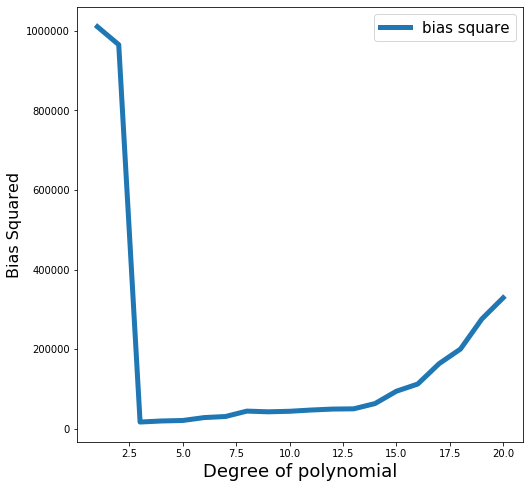

In [12]:
fig=plt.figure(figsize=(8,8))
plt.plot(degs,bias_sqr, label='bias square',linewidth=5)
plt.xlabel('Degree of polynomial', fontsize=18)
plt.ylabel('Bias Squared', fontsize=16)
plt.legend(prop={'size': 15})


## A note about variance
Variance is the variability of a model prediction for a given data point. Again, imagine
we can repeat the entire model building process multiple times. The variance is how
much the predictions for a given point vary between different realizations of the models.

In other words, variance captures how much your classifier changes if we train on a different training set.
**It represents how "over-specialized" the classifier is to a particular training set (overfitting).**

### Assignment specific details about variance
In general, variance increases with increase in model complexity (here, the degree of the polynomial).
This is because as we increase polynomial complexity, **it becomes more flexible for the model to fit even the minor deviations in the current training dataset partition. Each time the model is trained, the increased flexibility of the higher degree polynomials causes the coefficients to turn out considerably different due to differences in the training set (the classifier fails to generalize on the data). 
**
In other words, the model tries to fit the data points for each of the 10 training sets. As the degree increases, the model better fits each of these data chunks (each of size 800) . This results in higher variation among the different training sets. At higher degrees of polynomial, the variance begins to saturate at a high value as there is no better fitting of data left to do. The difference in the placement of coordinates in these training chunks can be seen below.

Text(0.5, 0.98, 'the partition of the dataset into 10 datasets')

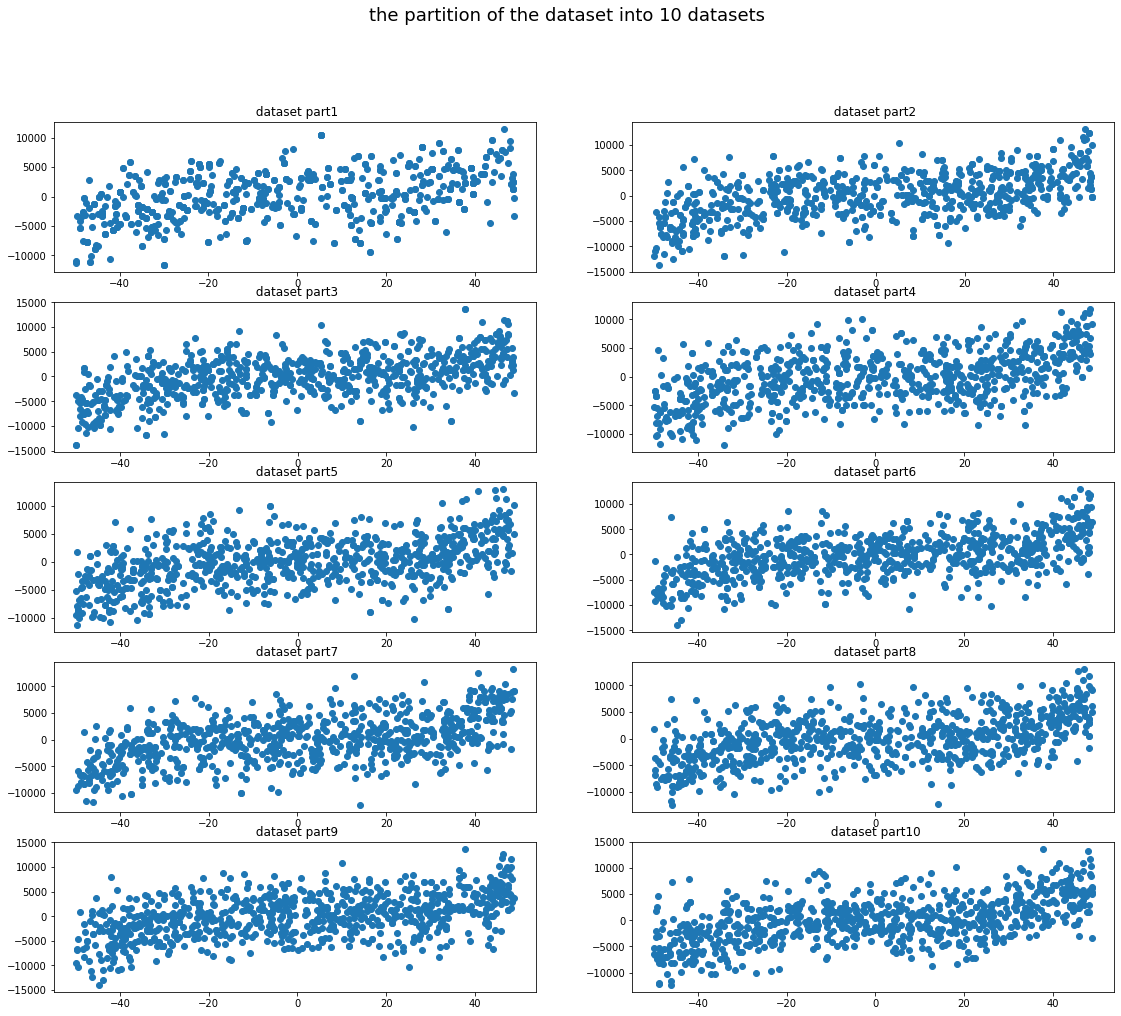

In [13]:
nrows=5
ncols=2
fig, ax = plt.subplots(nrows, ncols, figsize=(19,16))
#print(type(ax[0]))
#print(ax)
part=0
for i in range(0,nrows):
    for j in range(0,ncols):
     #random_df.plot(kind='scatter', x=col, y='MEDV', ax=ax[i])
     #plt.plot(x=train_data[part*part_size:(part+1)*part_size ,0], y=train_data[part*part_size:(part+1)*part_size ,1], ax=ax[i])
        x_c=train_data[part*part_size:(part+1)*part_size ,0]
        x_c= np.asarray(x_c).reshape(-1)
        y_c=train_data[part*part_size:(part+1)*part_size ,1]
        y_c= np.asarray(y_c).reshape(-1)
        #print(x_c)
        #print(type(x_c))
        ax[i][j].scatter(x_c,y_c)
        ax[i][j].set_title(" dataset part" + str(part+1))
        part+=1
        if part>=divs:
            break
    if part>=divs:
            break
fig.suptitle('the partition of the dataset into 10 datasets', fontsize=18)

#fig.subtitle('My Scatter Plots')
#fig.tight_layout()
#fig.subplots_adjust(top=0.95)

#plt.show()
#plt.clf()
#plt.close()

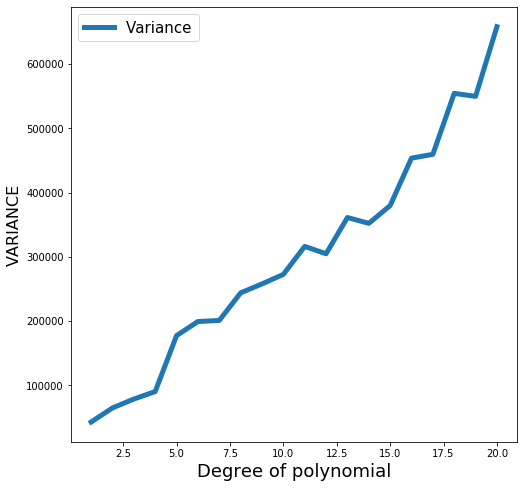

In [14]:
fig=plt.figure(figsize=(8,8))
plt.plot(degs,variance, label='Variance',linewidth=5)
plt.xlabel('Degree of polynomial', fontsize=18)
plt.ylabel('VARIANCE', fontsize=16)
plt.legend(prop={'size': 15})

## Observeration

We notice that the total error get minimzed at polynomial of degree 3. Details have been mentioned in the bias-variance tradeoff explaination below.

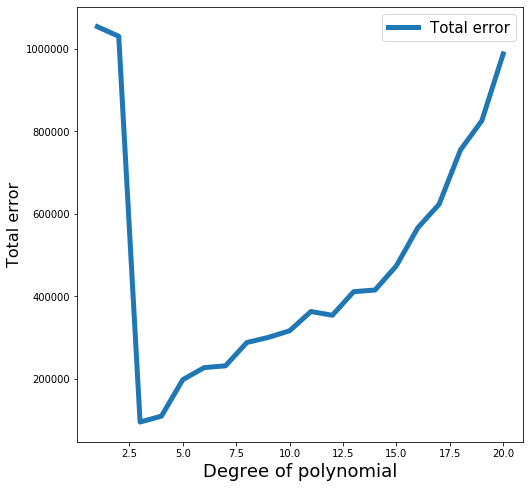

In [15]:
fig=plt.figure(figsize=(8,8))
plt.plot(degs,tot_error, label='Total error',linewidth=5)
plt.xlabel('Degree of polynomial', fontsize=18)
plt.ylabel('Total error', fontsize=16)
plt.legend(prop={'size': 15})


## A detailed description as to why noise (irreducible error) does not change even when we change polynomial 
Irreducible error is the **property of the dataset**. **The value of irreducible error must not change and is independent of  the type of the algorithm being used**. It is the error which a model cannot escape, no matter how perfect it is. On a glance at the coordinates in the test data set, we noticed that the test data set has a one-one mapping and hence, we are able to predict, even before we trained our model, that the theoretical value of **irreducible error should be zero**. This prediction of ours was validated by the values we obtained while training using polynomials of different degrees. **The irreducible error is almost zero for all polynomial degrees (not exactly zero due to precision errors in python).** As expected, the value of irreducible error does not change as ‘irreducible error’ is the aspect of data.

## A note on the bias-variance tradeoff
We explain bias variance tradeoff with help of some cases:
For degrees 1 and 2: For polynomial degrees 1 and 2, the trained model is oversimplified (the polynomial degree is not sufficient enough to capture the insights from the dataset) and results in a high bias (underfitting). It performs equally badly for all 10 training sets, hence variance is low and hence, even on the test set, the predictions are almost equally bad for all the 10 realizations of the model.

For degree 3: At degree 3, total error (sum of bias and variance) is at its minimum, showing that the data is actually best fit on a cubic function.

From degrees 4 to 10: We see that bias keeps almost constant whereas variance increases. We already know that a cubic fit the test set best. The polynomials of degree greater than 3 are almost able to obtain the same level of bias as they manage to keep coefficients of higher ‘x’ powers ($x^4$ onwards) very small and hence, not much difference is able to arise. However, variance keeps on increasing and as even though the higher coeffs are low, the higher coeffs of the 10 realizations of a model are different to fit their corresponding train sets and hence, produce different values for the points in the test set.

## Our comments on the dataset
Our perception about the datasets are as follows:

The training data set follows a cubic function trend which is why we obtain a low total error when training our model to be a polynomial of degree 3.
The test data set and training data set seem to display different properties as far as noise is concerned.  Evidence of this is the fact that the training dataset has a very high amount of noise (even for the same input ‘x’, there are several ‘y’ values in the training set). (A brief example regarding this would be the selling price of 5 identical houses being sold at quite different prices (2Cr, 3Cr, 2.5 Cr, 2.25 Cr, 3.5 Cr). However, the test dataset theoretically has zero noise as whenever the same input ‘x’ is present, the output is the same as well.
In the training set, even for a fixed value of ‘x’, the corresponding ‘y’ values seem to be highly dispersed.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e436441c-dbe5-4fe0-9823-65d3faf95ee7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>